<a href="https://colab.research.google.com/github/elahekarimi/Fraud-detection/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, auc
import xgboost as xgb
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 31.2 MB/s eta 0:00:00


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Fraud_dataset/creditcard.csv/creditcard.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.head(-5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


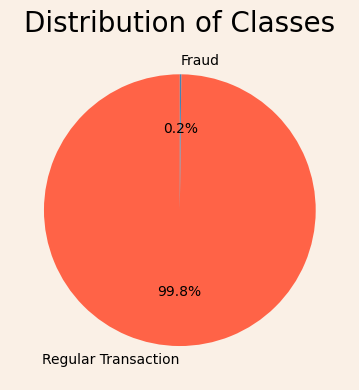

In [9]:
class_counts = df['Class'].value_counts()

colors = ['#FF6347', '#4682B4']

plt.figure(figsize=(6, 4))
plt.pie(class_counts, labels=['Regular Transaction', 'Fraud'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Classes', fontsize=20)

plt.gca().set_facecolor('#F5F5F5')
plt.gcf().patch.set_facecolor('#FAF0E6')

plt.tight_layout()
plt.show()


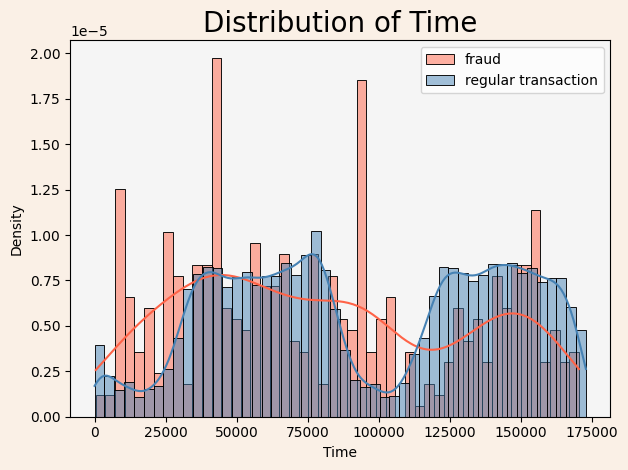

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Time'][df.Class == 1], color='#FF6347', kde=True, stat="density", bins=50, label='fraud')
sns.histplot(df['Time'][df.Class == 0], color='#4682B4', kde=True, stat="density", bins=50, label='regular transaction')

plt.title('Distribution of Time', fontsize=20)
plt.legend()

plt.gca().set_facecolor('#F5F5F5')
plt.gcf().patch.set_facecolor('#FAF0E6')

plt.tight_layout()
plt.show()


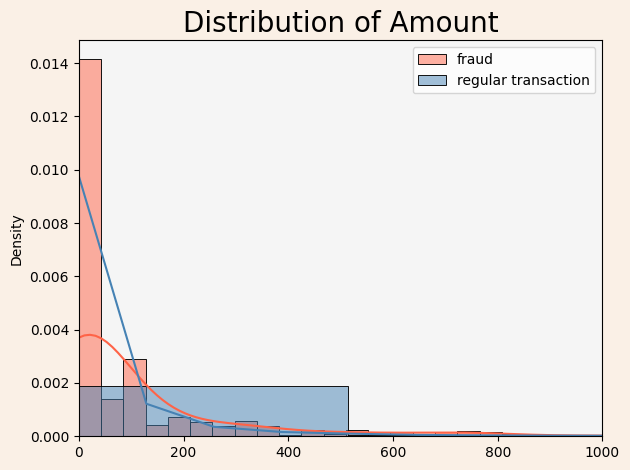

In [11]:
sns.histplot(df['Amount'][df.Class == 1], color='#FF6347', kde=True, stat="density", bins=50, label='fraud')
sns.histplot(df['Amount'][df.Class == 0], color='#4682B4', kde=True, stat="density", bins=50, label='regular transaction')

plt.xlim(0, 1000)

plt.xlabel('')
plt.title('Distribution of Amount', fontsize=20)
plt.legend()

plt.gca().set_facecolor('#F5F5F5')
plt.gcf().patch.set_facecolor('#FAF0E6')

plt.tight_layout()
plt.show()


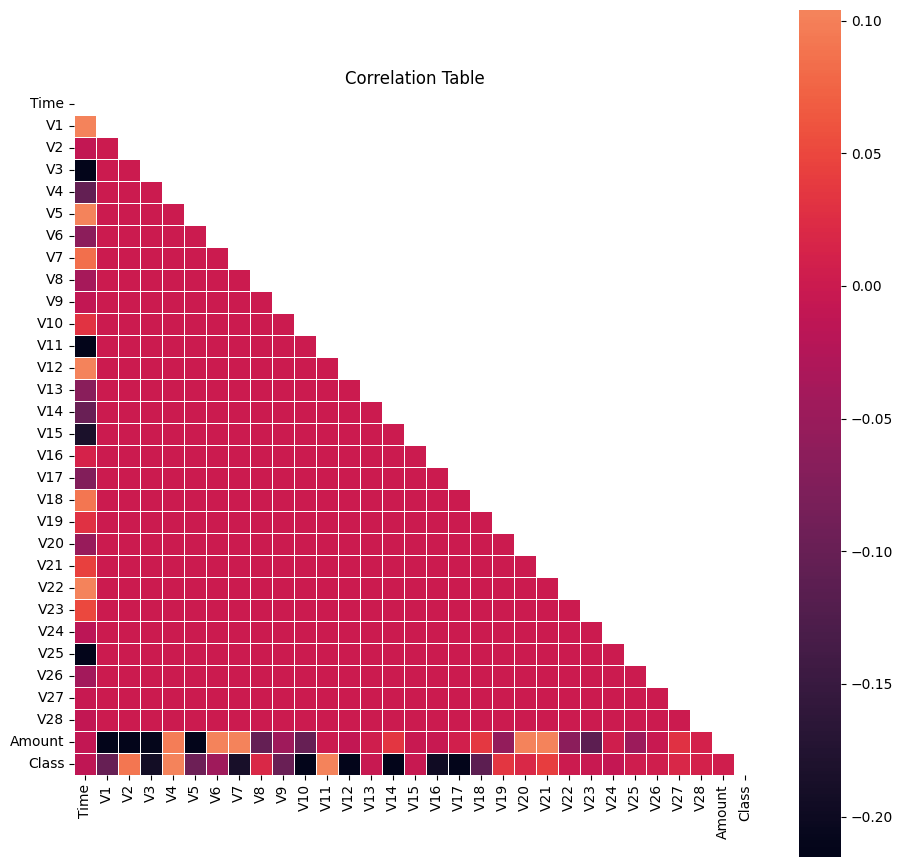

In [12]:
plt.figure(figsize=(11,11))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, robust=True, center=0, square=True, cmap="rocket", linewidths=.6)
plt.title('Correlation Table')
plt.show()

In [13]:
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc')
xgb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = xgb_model.predict(X_test)


Accuracy: 99.96%


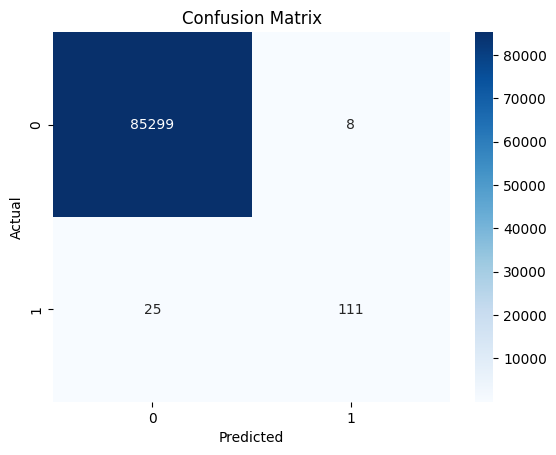

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



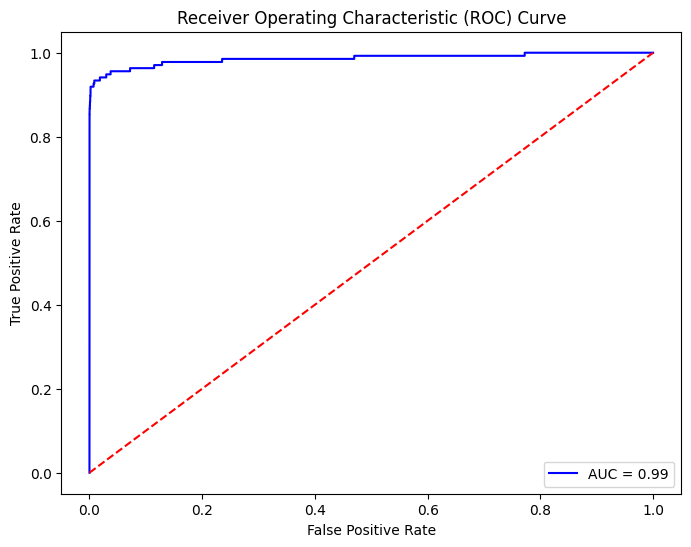

In [15]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC-AUC Curve
y_proba = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


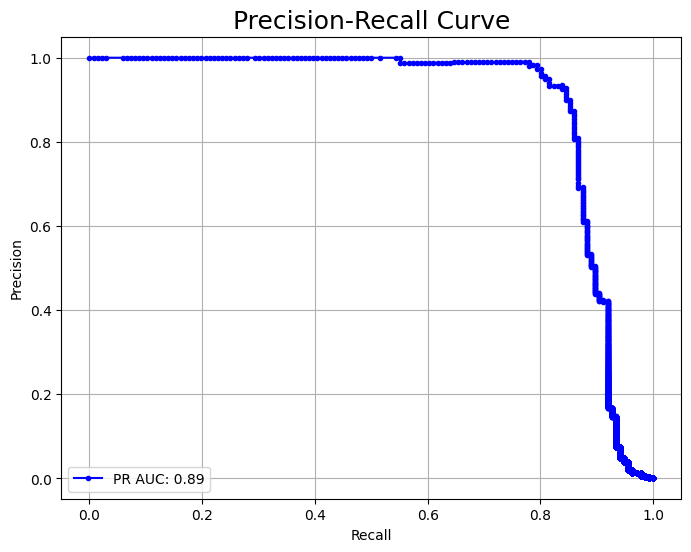

In [16]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='blue', label=f'PR AUC: {pr_auc:.2f}')
plt.title('Precision-Recall Curve', fontsize=18)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.legend(loc='lower left')
plt.show()


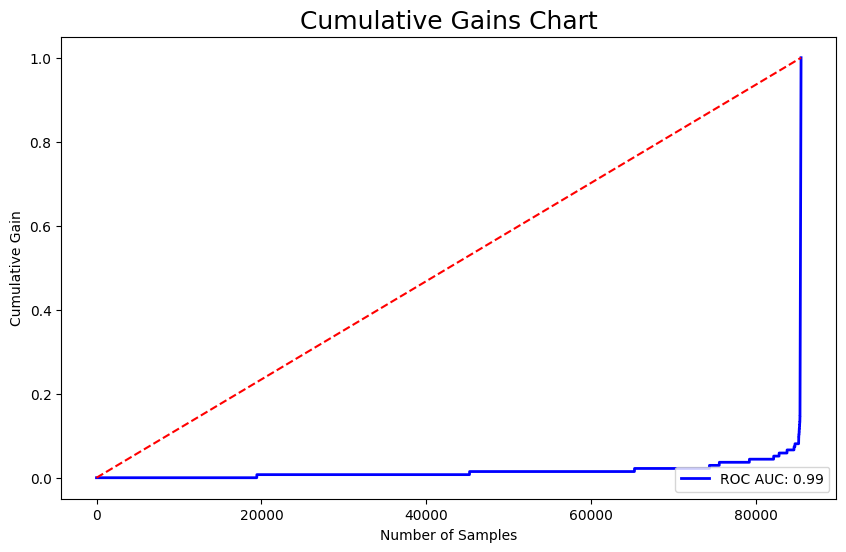

In [17]:
sorted_indices = np.argsort(y_proba)
sorted_actual = y_test.iloc[sorted_indices]

cumulative_gains = np.cumsum(sorted_actual) / np.sum(sorted_actual)

roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_gains) + 1), cumulative_gains, color='blue', linewidth=2, label=f'ROC AUC: {roc_auc:.2f}')
plt.plot([0, len(cumulative_gains)], [0, 1], color='red', linestyle='--')
plt.title('Cumulative Gains Chart', fontsize=18)
plt.xlabel('Number of Samples')
plt.ylabel('Cumulative Gain')
plt.legend(loc='lower right')
plt.show()


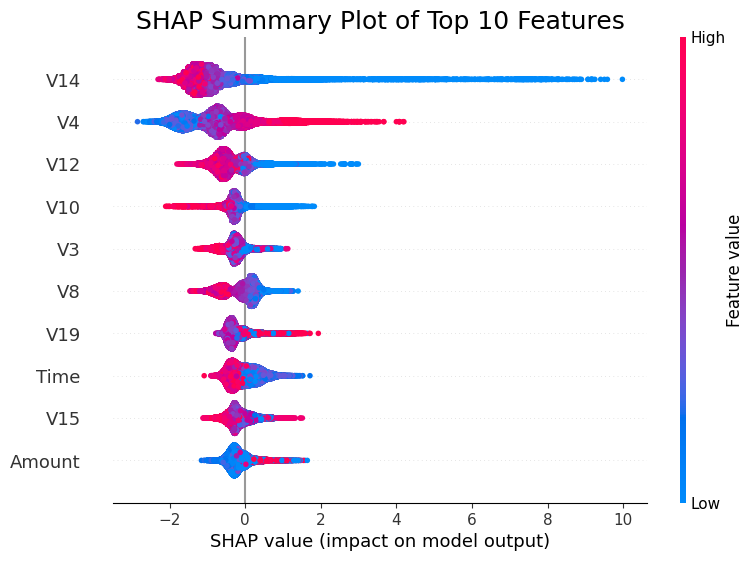

In [18]:
# Calculate SHAP values
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_train)

# Create a summary plot of the SHAP values
shap.summary_plot(shap_values, X_train, plot_type='dot', max_display=10, show=False)
plt.title('SHAP Summary Plot of Top 10 Features', fontsize=18)
plt.show()


**doplicated data**

In [19]:

def find_duplicates(df):
    # Check for duplicates across all columns
    duplicate_rows = df[df.duplicated(keep=False)]

    if not duplicate_rows.empty:
        print(f"Found {duplicate_rows.shape[0]} duplicate rows:")
        return duplicate_rows
    else:
        print("No duplicate rows found.")
        return pd.DataFrame()

# Usage example
duplicate_data = find_duplicates(df)

# If you want to drop the duplicates:
df_cleaned = df.drop_duplicates()

# Optionally, reset the index of the cleaned DataFrame
df_cleaned.reset_index(drop=True, inplace=True)


Found 1854 duplicate rows:


In [20]:
print(f"Dropped {df.shape[0] - df_cleaned.shape[0]} duplicate rows. The cleaned DataFrame now has {df_cleaned.shape[0]} rows.")

df = df_cleaned

Dropped 1081 duplicate rows. The cleaned DataFrame now has 283726 rows.


**Outliers**

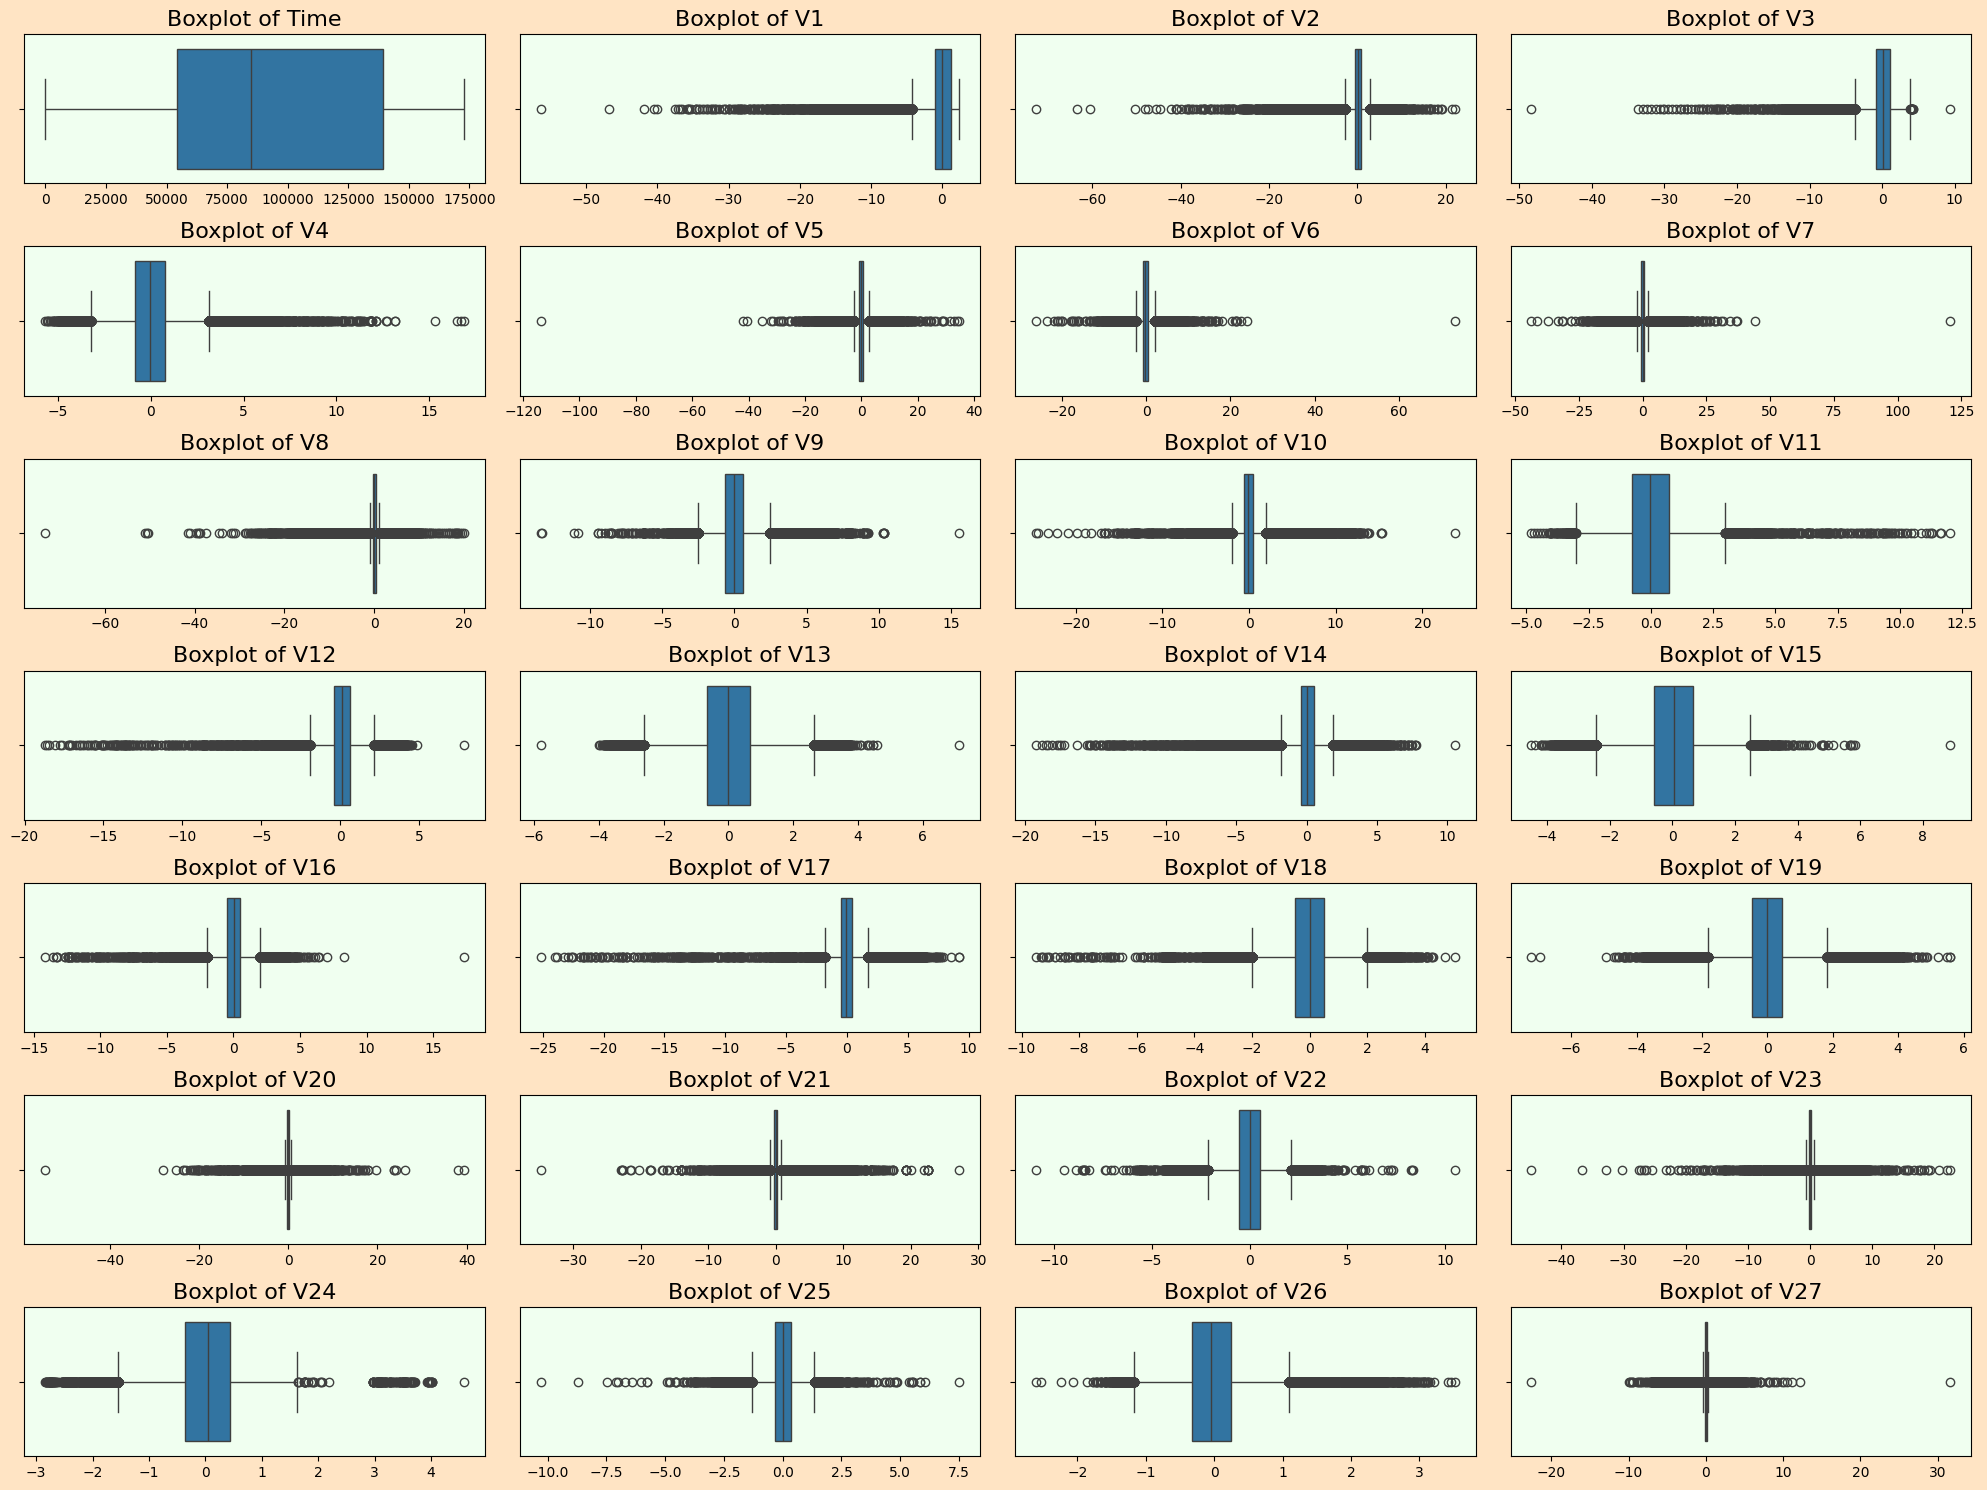

In [21]:
num_plots_per_row = 4
num_rows = 7
features = list(df.columns.values)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_plots_per_row, figsize=(20, 15))
fig.patch.set_facecolor('bisque')

for i in range(num_rows):
    for j in range(num_plots_per_row):
        feature = features[i * num_plots_per_row + j]
        ax = axes[i, j]
        sns.boxplot(x=df[feature], ax=ax)
        ax.set_title(f'Boxplot of {feature}', fontsize=16)
        ax.set_facecolor('honeydew')
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [23]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)].copy()



df_clean = remove_outliers(df, 'Amount')


X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

print("Number of NaN values in 'y' before handling:", y.isna().sum())
y.dropna(inplace=True)
print("Number of NaN values in 'y' after handling:", y.isna().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Number of NaN values in 'y' before handling: 0
Number of NaN values in 'y' after handling: 0
Accuracy: 1.00


Accuracy: 99.96%


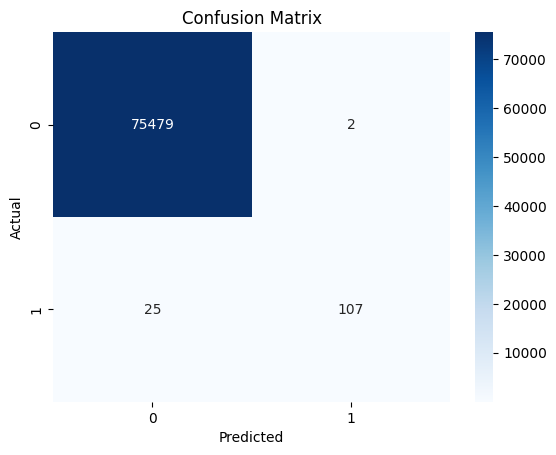

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75481
           1       0.98      0.81      0.89       132

    accuracy                           1.00     75613
   macro avg       0.99      0.91      0.94     75613
weighted avg       1.00      1.00      1.00     75613



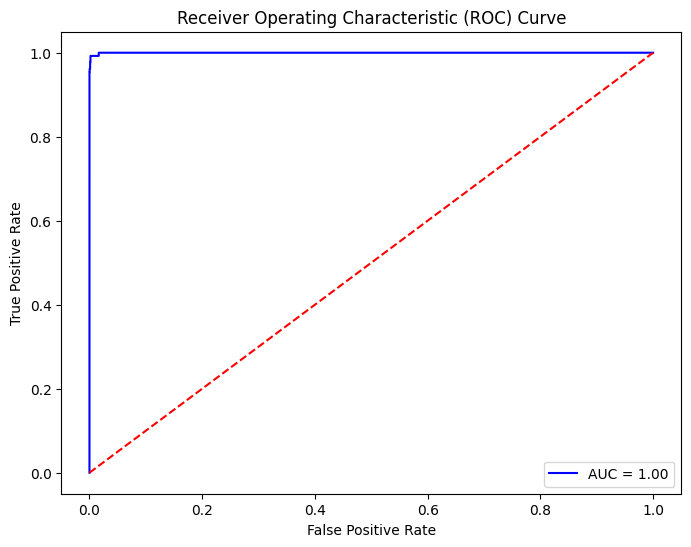

In [24]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC-AUC Curve
y_proba = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


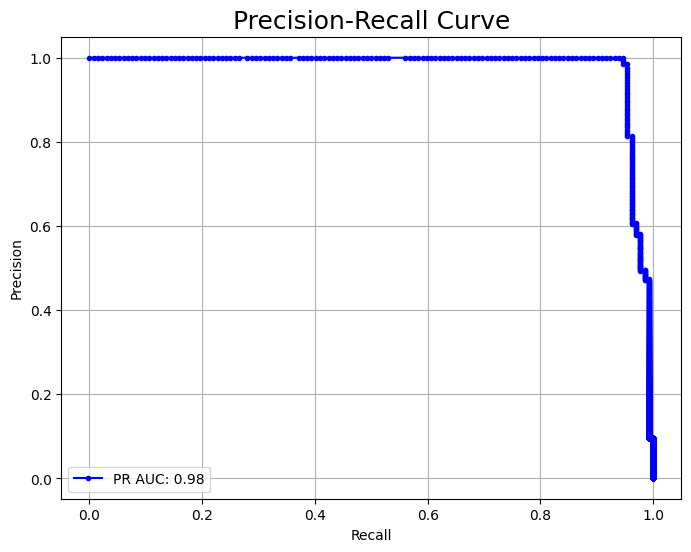

In [25]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='blue', label=f'PR AUC: {pr_auc:.2f}')
plt.title('Precision-Recall Curve', fontsize=18)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.legend(loc='lower left')
plt.show()

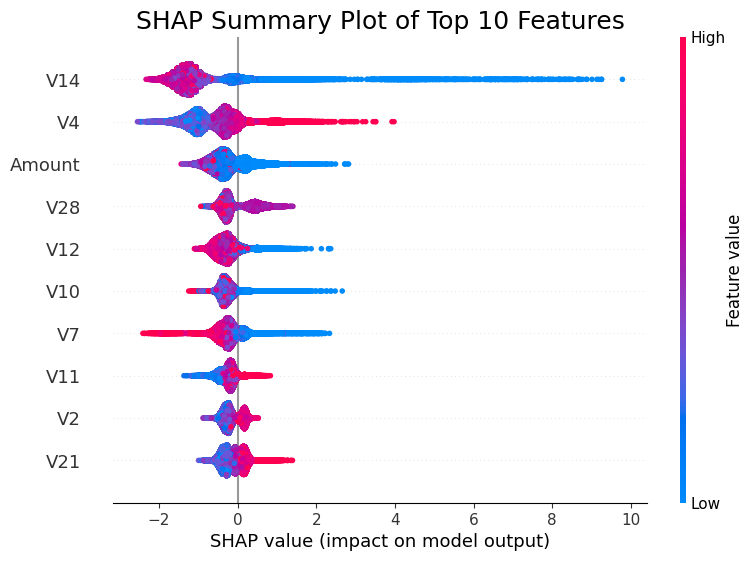

In [26]:
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train, plot_type='dot', max_display=10, show=False)
plt.title('SHAP Summary Plot of Top 10 Features', fontsize=18)
plt.show()